<a href="https://colab.research.google.com/github/SrutiGoteti/IIIT-AI-ML-labs-and-projects/blob/main/AIML_Module_3_Lab_1_Understanding_Distance_metrics_and_Introduction_to_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [5]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

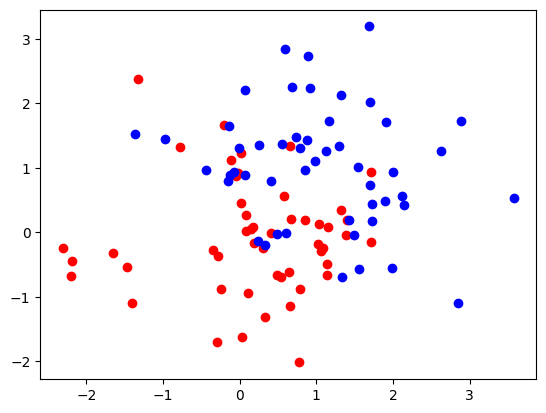

In [6]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

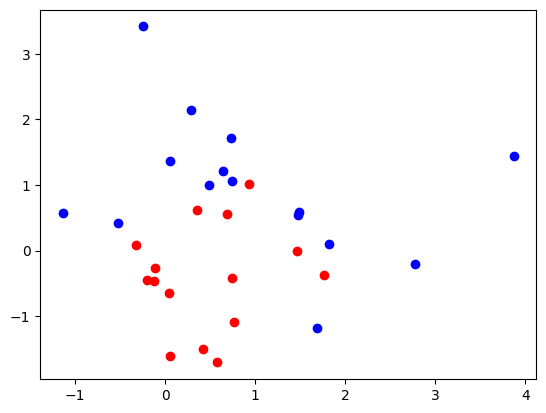

In [7]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

metrics = [
    ('euclidean', {}),
    ('manhattan', {}),
    ('chebyshev', {}),
    ('minkowski', {'p': 3}),
    ('minkowski', {'p': 1}),
    ('hamming', {})
]

for metric_name, params in metrics:
    print(f"\nUsing metric: {metric_name} {params}")

    knn = KNeighborsClassifier(n_neighbors=3, metric=metric_name, **params)
    knn.fit(pts, tgts)
    our_predictions = knn.predict(test_pts)
    accuracy = 100 * np.mean(our_predictions == test_tgts)
    print(f"Prediction Accuracy: {accuracy:.2f}%")



Using metric: euclidean {}
Prediction Accuracy: 90.00%

Using metric: manhattan {}
Prediction Accuracy: 90.00%

Using metric: chebyshev {}
Prediction Accuracy: 83.33%

Using metric: minkowski {'p': 3}
Prediction Accuracy: 86.67%

Using metric: minkowski {'p': 1}
Prediction Accuracy: 90.00%

Using metric: hamming {}
Prediction Accuracy: 50.00%


Metrics like Hamming are not appropriate here because you’re working with continuous numeric data, not binary or categorical labels.

---
### Questions to Think About and Answer:

1. How are similarity and distance different from each other?  

2. Are there any conditions for a particular distance to be considered a "distance metric"?



### Q1. How are similarity and distance different from each other?

| **Aspect**           | **Similarity**                                      | **Distance**                                         |
|----------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**        | Measures how **alike** two objects are               | Measures how **different** or **far apart** two objects are |
| **Value Range**       | Typically **higher** means more similar (e.g., cosine similarity ranges from -1 to 1 or 0 to 1) | Typically **lower** means more similar (distance of 0 means identical) |
| **Usage**             | Clustering, recommendation systems (e.g., item similarity) | KNN, clustering, anomaly detection (based on dissimilarity) |
| **Examples**          | Cosine similarity, Jaccard similarity                | Euclidean, Manhattan, Chebyshev, etc.                |
| **Intuition**         | Closeness in terms of **shared properties or patterns** | Closeness in terms of **physical or geometric separation** |



---

### Q2. Are there any conditions for a particular distance to be considered a "distance metric"?

Yes, to qualify as a proper **distance metric**, a function must satisfy the following **four conditions (metric axioms)**:

Let d(x, y) be a distance function. It must satisfy:

| **Property**                  | **Description**                                                        | **Mathematical Form**                       |
|------------------------------|------------------------------------------------------------------------|---------------------------------------------|
| **1. Non-negativity**         | Distance is always zero or positive                                    | `d(x, y) ≥ 0`                               |
| **2. Identity of indiscernibles** | Distance is zero **iff** both points are the same                      | `d(x, y) = 0` **if and only if** `x = y`    |
| **3. Symmetry**               | Distance from `x` to `y` is the same as from `y` to `x`                 | `d(x, y) = d(y, x)`                         |
| **4. Triangle Inequality**    | Going directly is always shorter than going via another point          | `d(x, z) ≤ d(x, y) + d(y, z)`               |

